In [1]:
# General
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Hypothesis testing
from scipy.stats import chi2_contingency, ttest_ind


In [9]:
# Load dataset
df = pd.read_csv("loan_data.csv")

In [13]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [17]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [19]:
data.drop_duplicates(inplace=True)

In [21]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


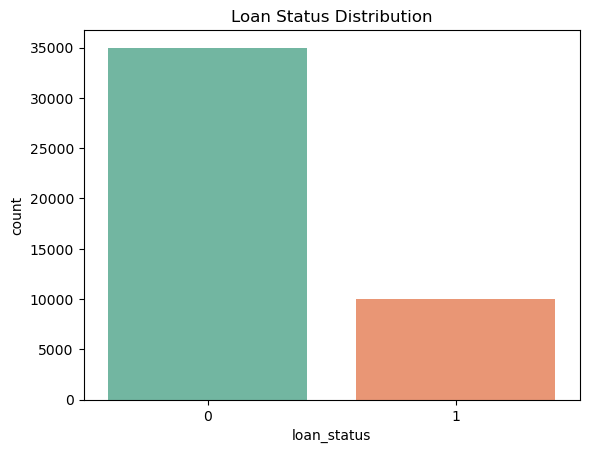

In [23]:
# Visualizing loan status distribution
sns.countplot(x='loan_status', data=data, palette='Set2')
plt.title("Loan Status Distribution")
plt.show()

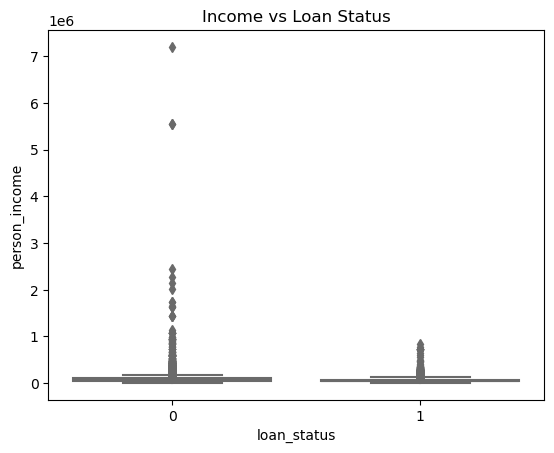

In [25]:
# Visualizing income distribution by loan status
sns.boxplot(x='loan_status', y='person_income', data=data, palette='Set3')
plt.title("Income vs Loan Status")
plt.show()

C:\Users\soura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


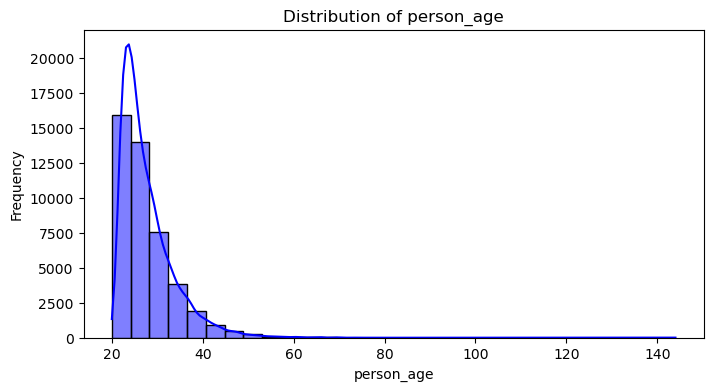

C:\Users\soura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


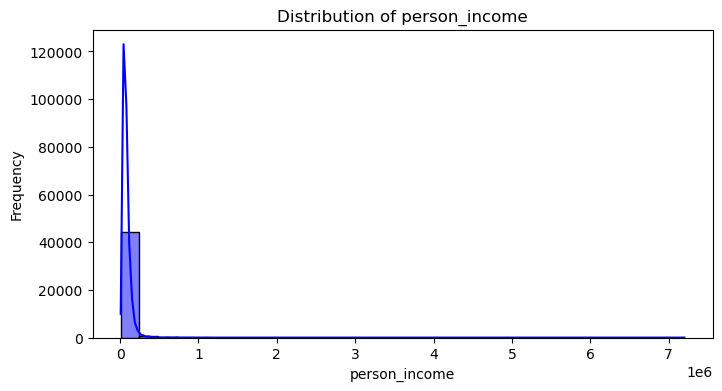

C:\Users\soura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


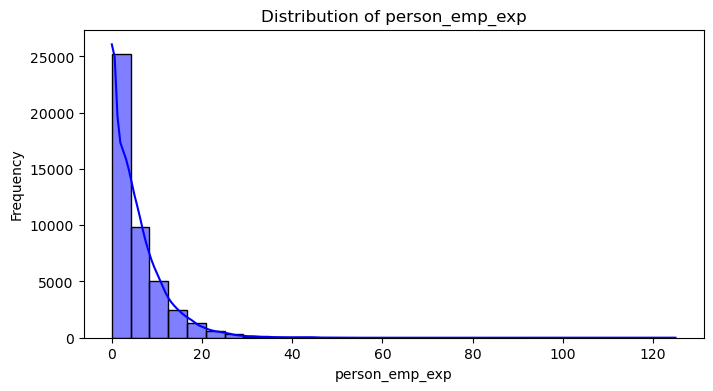

C:\Users\soura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


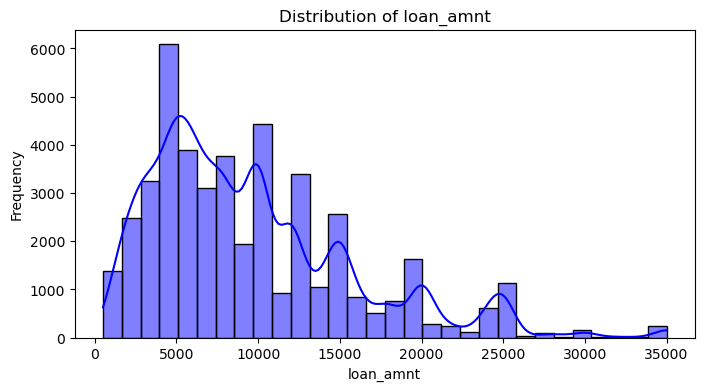

C:\Users\soura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


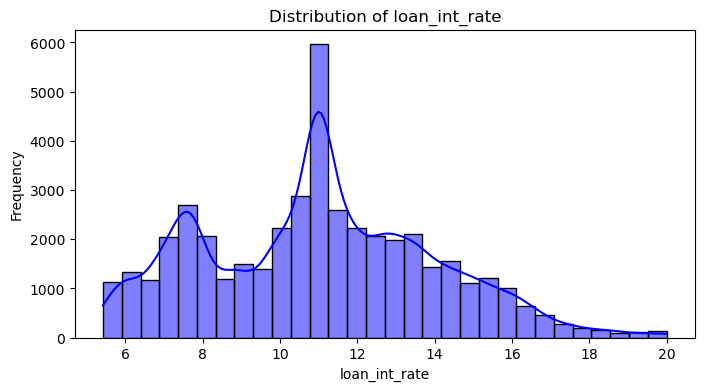

C:\Users\soura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


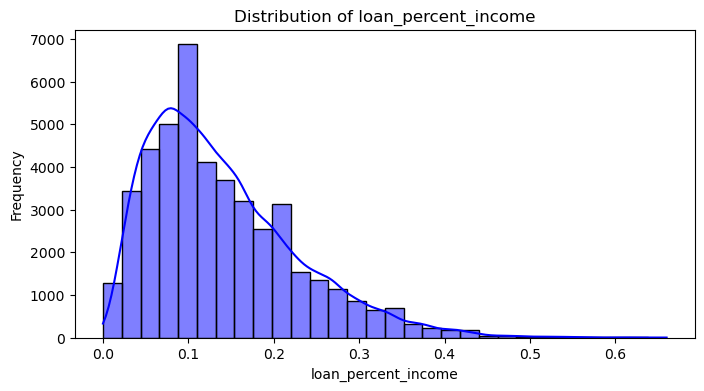

C:\Users\soura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


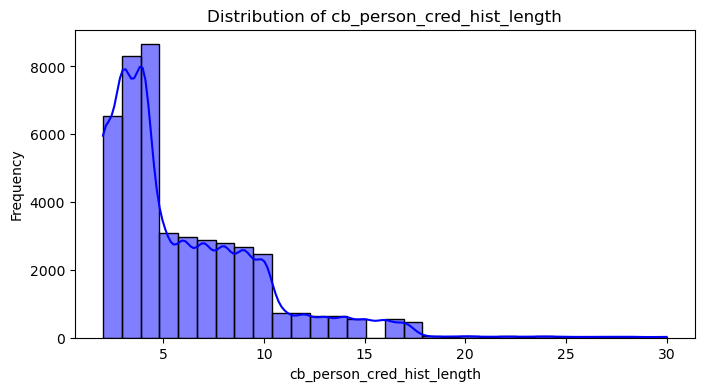

C:\Users\soura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


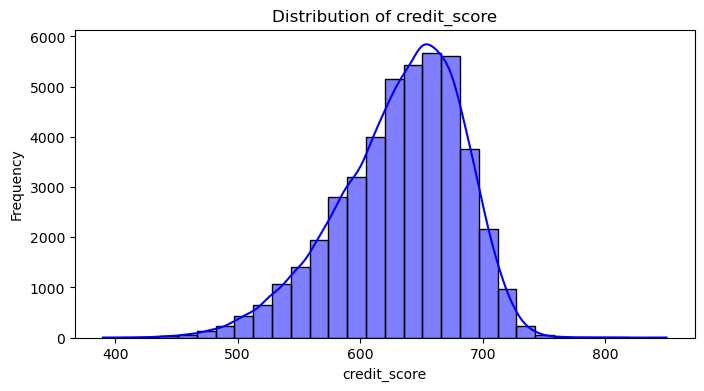

In [27]:
# 1. Check the distribution of numeric features
numeric_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

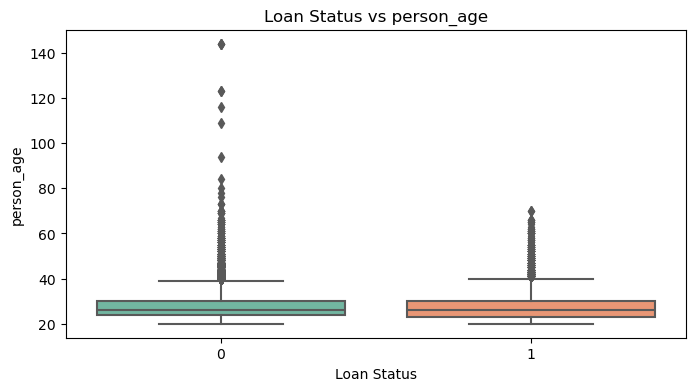

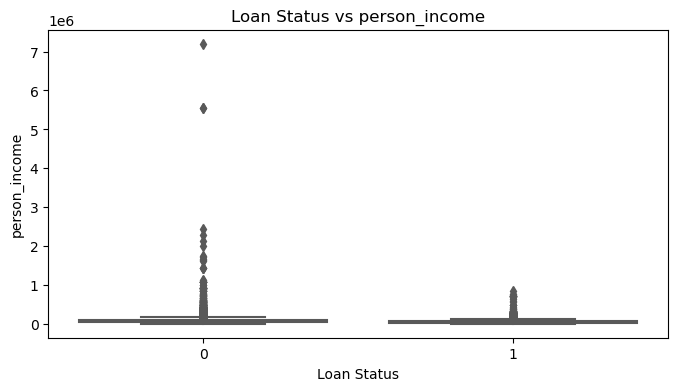

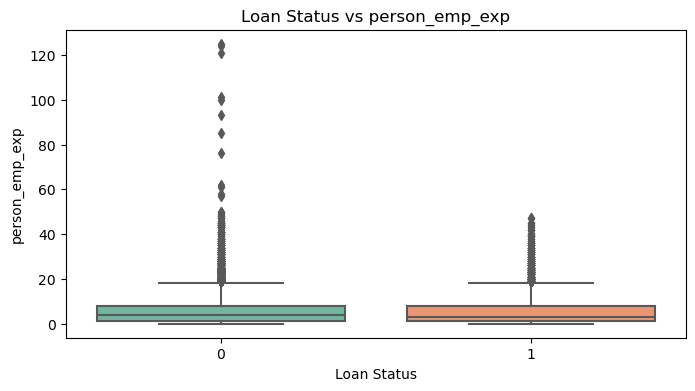

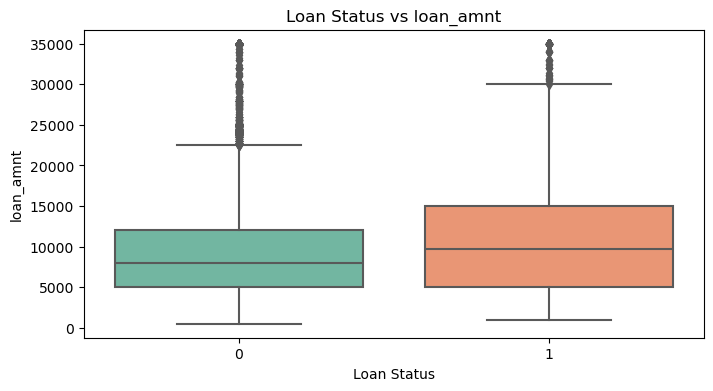

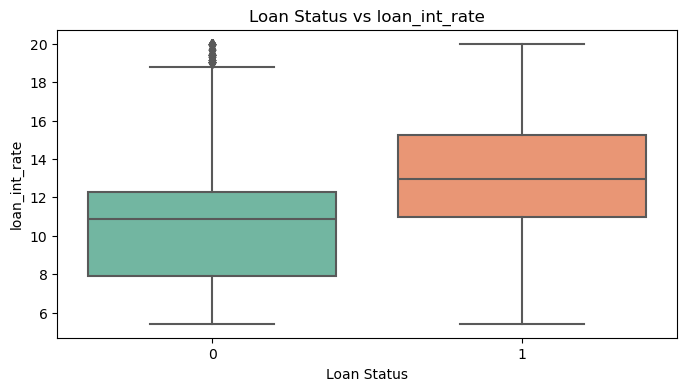

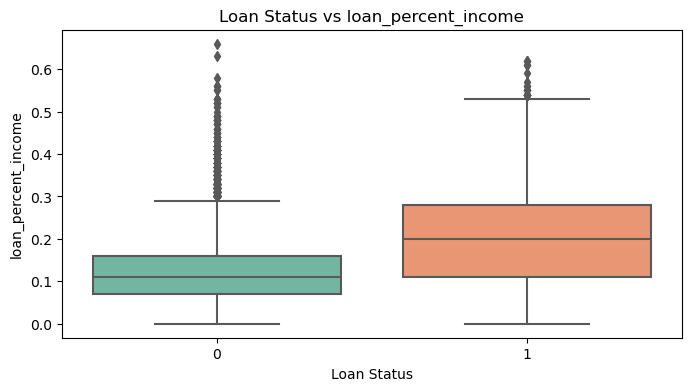

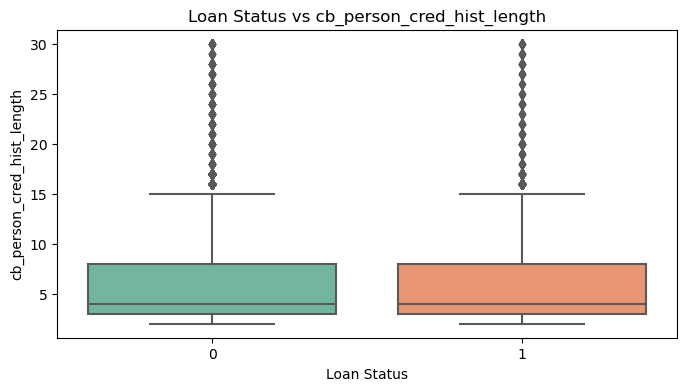

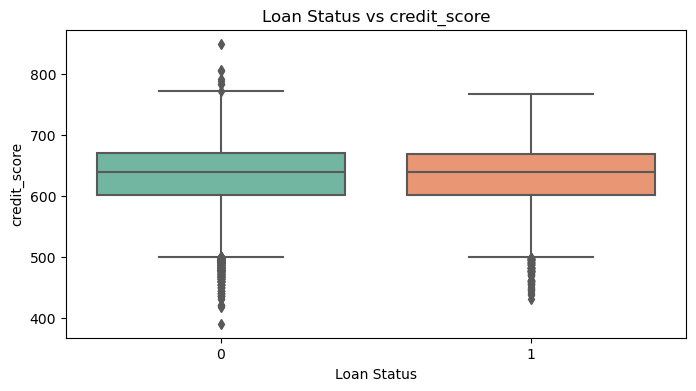

In [29]:
# 2. Loan Status vs. Numeric Features (Boxplots)
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data['loan_status'], y=data[feature], palette='Set2')
    plt.title(f'Loan Status vs {feature}')
    plt.xlabel('Loan Status')
    plt.ylabel(feature)
    plt.show()

C:\Users\soura\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


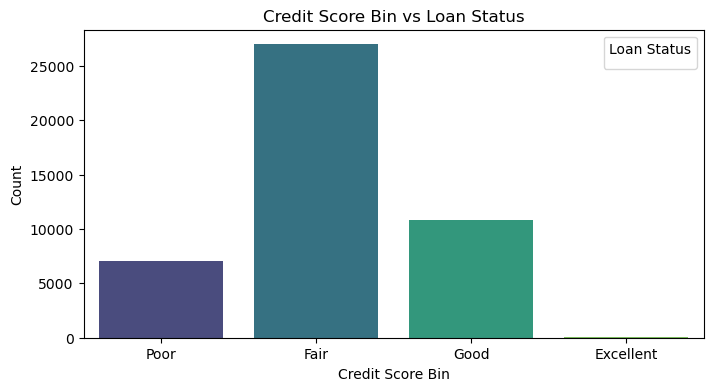

In [42]:
# 6. Credit Score Binning and Analysis
data['credit_score_bin'] = pd.cut(data['credit_score'], bins=[300, 580, 670, 740, 850], 
                                  labels=['Poor', 'Fair', 'Good', 'Excellent'])
plt.figure(figsize=(8, 4))
sns.countplot(x='credit_score_bin', data=data, palette='viridis')
plt.title('Credit Score Bin vs Loan Status')
plt.xlabel('Credit Score Bin')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

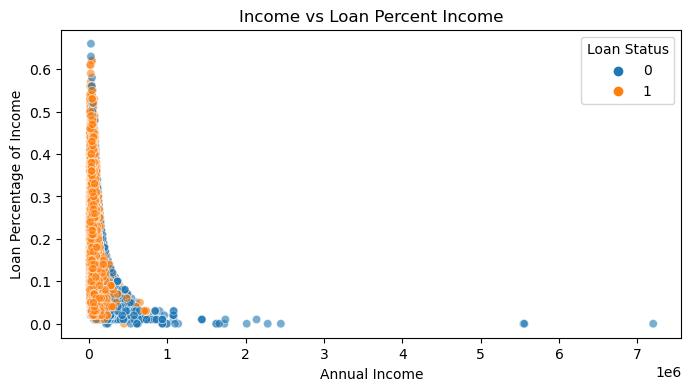

In [44]:
# 7. Income Percentage Allocation for Loans
plt.figure(figsize=(8, 4))
sns.scatterplot(x='person_income', y='loan_percent_income', hue='loan_status', data=data, alpha=0.6)
plt.title('Income vs Loan Percent Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Percentage of Income')
plt.legend(title='Loan Status')
plt.show()

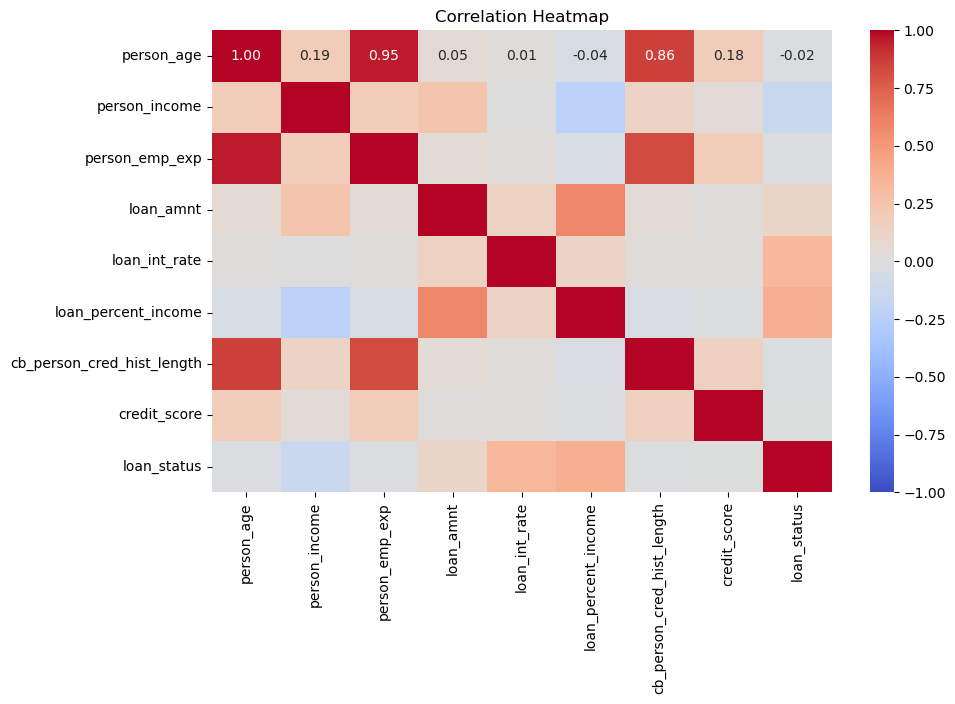

In [46]:
# 4. Heatmap of correlations
plt.figure(figsize=(10, 6))
correlation_matrix = data[numeric_features + ['loan_status']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [97]:
# Chi-Square Test for Categorical Features
cat_features = ['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'credit_score_bin']
for feature in cat_features:
    contingency_table = pd.crosstab(data[feature], data['loan_status'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Feature: {feature}, p-value: {p}")

Feature: person_gender, p-value: 0.9142540404277906
Feature: person_home_ownership, p-value: 0.0
Feature: loan_intent, p-value: 2.173084187054017e-194
Feature: previous_loan_defaults_on_file, p-value: 0.0
Feature: credit_score_bin, p-value: 0.3412989071930366


In [50]:
### Hence person_home_ownership and loan_intent, these two features are highly associated with loan status
### highly associated with previous loan defaults and home ownership

In [52]:
# T-test for Numerical Features
num_features = ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
for feature in num_features:
    group1 = data[data['loan_status'] == 1][feature]
    group2 = data[data['loan_status'] == 0][feature]
    t_stat, p_val = ttest_ind(group1, group2)
    print(f"Feature: {feature}, p-value: {p_val}")

Feature: person_income, p-value: 3.4830994169490465e-184
Feature: loan_amnt, p-value: 3.236704416270359e-116
Feature: loan_int_rate, p-value: 0.0
Feature: loan_percent_income, p-value: 0.0


In [54]:
### person_income: The mean income is significantly different between approved and rejected loans. Likely, higher income leads to higher approval rates.
#### loan_amnt: Loan amounts requested by approved applicants differ significantly from those requested by rejected applicants.
### loan_int_rate: Approved loans tend to have different interest rates compared to rejected loans.
## loan_percent_income: The proportion of loan amount to income shows a significant difference between approved and rejected loans.

In [72]:
# Encoding categorical variables
encoder = LabelEncoder()
categorical_columns = ['person_gender', 'person_home_ownership', 'loan_intent','previous_loan_defaults_on_file']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [83]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,credit_score_bin
0,22.0,0,Master,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1,Poor
1,21.0,0,High School,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0,Poor
2,25.0,0,High School,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1,Fair
3,23.0,0,Bachelor,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1,Good
4,24.0,1,Master,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1,Fair


In [101]:
df1 = data.drop(['person_education','credit_score_bin'], axis=1)

In [103]:
# Splitting features and target
X = df1.drop(['loan_status'], axis=1)
y = df1['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "SVC": SVC(kernel='linear', probability=True)
}

In [109]:
# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6990
           1       0.77      0.77      0.77      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000

[[6532  458]
 [ 460 1550]]
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.88      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.92      9000

[[6780  210]
 [ 451 1559]]
--------------------------------------------------
Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1  

In [111]:
# Compare accuracies
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print(results_df)

               Model  Accuracy
1      Random Forest  0.926556
2  Gradient Boosting  0.920111
4            Bagging  0.919778
3           AdaBoost  0.910778
0      Decision Tree  0.898000
5                SVC  0.890000


In [113]:
## Hence Random forest is giving highest accuracy

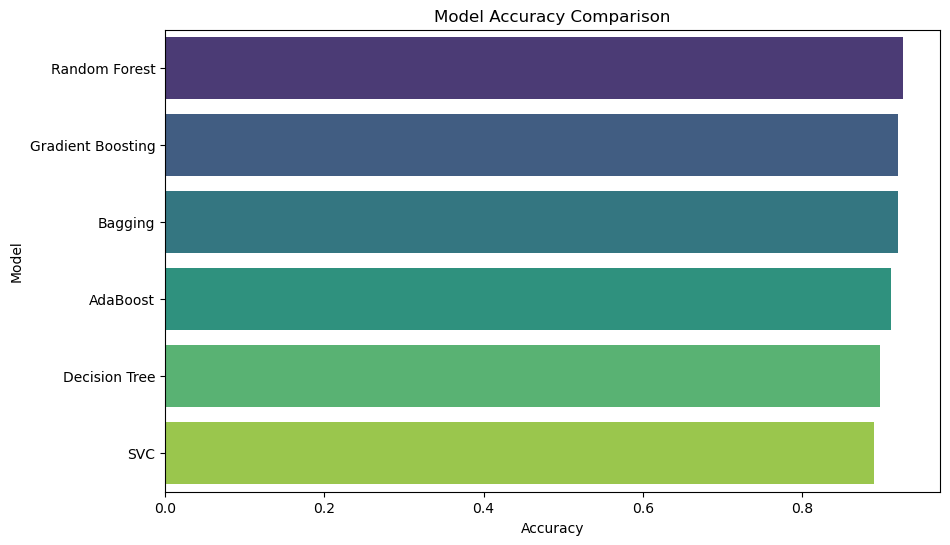

In [115]:
# Plot model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.show()